In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
a = np.loadtxt('result_W.dat')
w0 = np.loadtxt('w0.txt')

In [3]:
i = a[:,0].astype(int)
print(i)

[ 1  1  1 ... 19 19 19]


In [4]:
j = a[:,1].astype(int)
print(j)

[ 2  2  2 ... 20 20 20]


In [5]:
k = a[:,2].astype(int)
print(k)

[1 1 1 ... 3 3 3]


In [6]:
l = a[:,3].astype(int)
print(l)

[1 2 3 ... 1 2 3]


In [7]:
b = np.log(a[:,4])
print(b)

[-0.30246006 -0.07735632  0.         ...  0.          0.
  0.        ]


In [8]:
# number of position
n = j.max()
print(n)

20


In [9]:
# number of value at each position
m = k.max()
print(m)

3


In [10]:
c = np.zeros((n*m,n*m))

In [11]:
for ii in range(i.shape[0]):    
    i1 = (i[ii]-1)*m + (k[ii]-1)   # i[ii]-1 : converted matlab index to pytho
    j1 = (j[ii]-1)*m + (l[ii]-1)
    c[i1,j1] = b[ii]
    c[j1,i1] = b[ii]
    
print(c)

[[0.         0.         0.         ... 0.44278658 0.29851073 0.        ]
 [0.         0.         0.         ... 0.6791953  0.01616858 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.44278658 0.6791953  0.         ... 0.         0.         0.        ]
 [0.29851073 0.01616858 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [12]:
# w = w- w.sum() to compare with actual w0
n = 20
m = 3
mx = np.full(n,m)
print(mx)

mx_cumsum = np.insert(mx.cumsum(),0,0)
i1i2 = np.stack([mx_cumsum[:-1],mx_cumsum[1:]]).T  

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [13]:
for i0 in range(n):
    i1,i2 = i1i2[i0,0],i1i2[i0,1]    
    c[:,i1:i2] = c[:,i1:i2] - c[:,i1:i2-1].mean(axis=1)[:,np.newaxis]

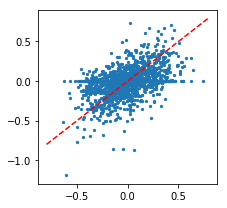

In [14]:
plt.figure(figsize=(3.2,3.2))
plt.plot([-0.8,0.8],[-0.8,0.8],'r--')
plt.scatter(np.triu(w0),np.triu(c),s=5)
plt.savefig('w_dca.pdf', format='pdf', dpi=100)

In [15]:
np.savetxt('result_w_converted.dat',c,fmt='% f')